Задание 1

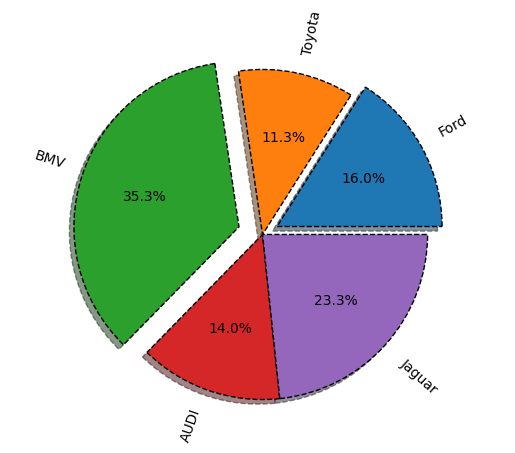

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "BMV", "AUDI", "Jaguar"]
explode = (0.1, 0, 0.15, 0, 0)

fig, ax = plt.subplots()

ax.pie(
    vals,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    explode=explode,
    wedgeprops={'lw': 1, 'ls': '--', 'edgecolor': "k"},  # Исправлено здесь
    rotatelabels=True
)
ax.axis("equal")
fig.show()

Задание 2

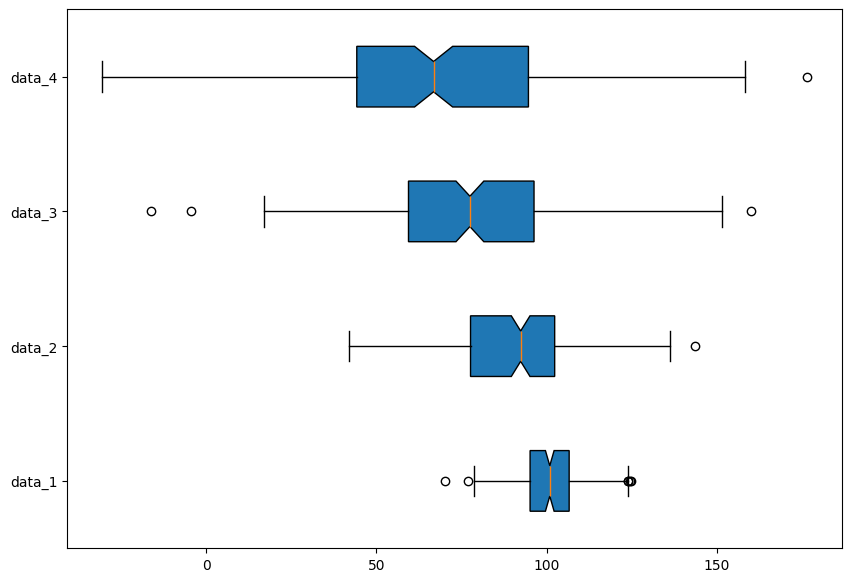

In [ ]:
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
notch ='True', vert = 0)

ax.set_yticklabels(['data_1', 'data_2','data_3', 'data_4'])

plt.show(bp)

3 Scatter Plots

<ipython-input-13-7e65b4b151db>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, s=area, c=colors, alpha=0.5)


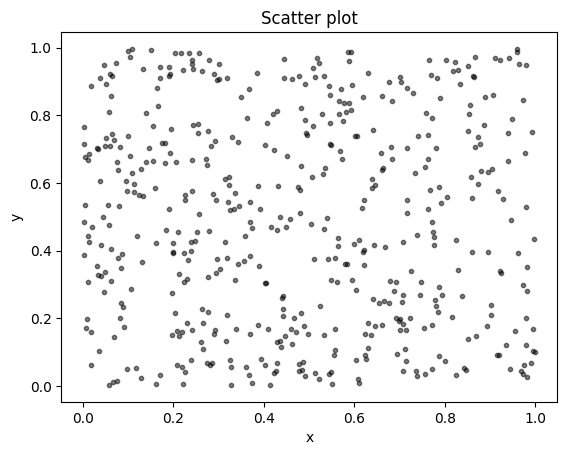

In [ ]:
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Задание 4: Bubble Plots

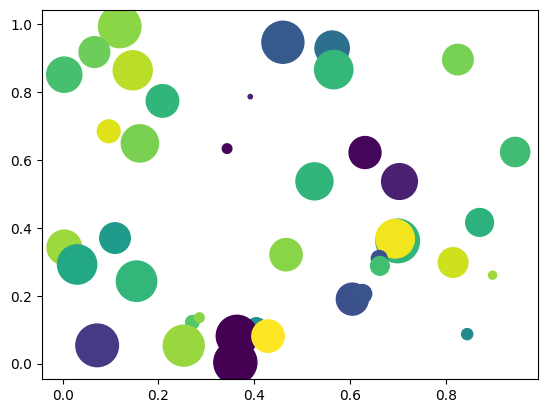

In [ ]:
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
colors = np.random.rand(40)

plt.scatter(x, y, s=z*1000,c=colors)

plt.show()

5. ЗАДАНИЕ: Постройте лестницу из случайного полученного количества
ступенек при помощи Scatter Plots, при том, что длина каждой ступени
увеличивается в 2 раза по отношению к предыдущей.


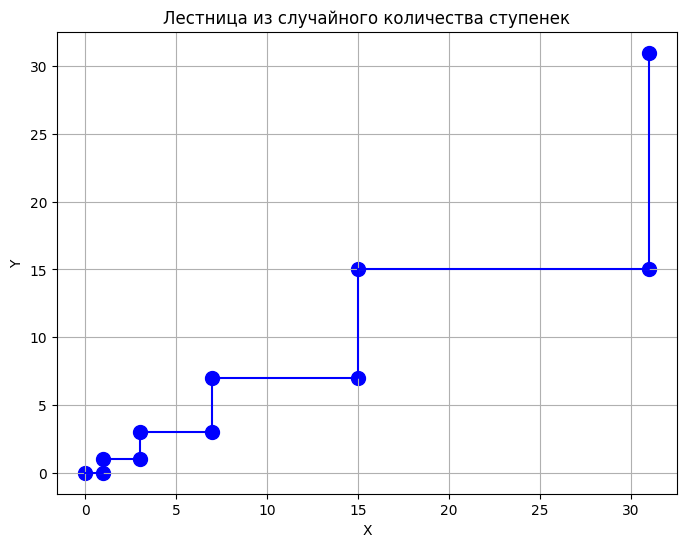

In [ ]:

# Генерируем случайное количество ступенек от 5 до 10
num_steps = np.random.randint(5, 10)

# Начальная длина первой ступени
initial_step_length = 1

# Массивы для координат точек
x_coords = [0]  # Начальная точка по оси X
y_coords = [0]  # Начальная точка по оси Y

# Генерация координат для каждой ступени
for i in range(1, num_steps + 1):
    # Увеличиваем длину ступени в 2 раза
    step_length = initial_step_length * (2 ** (i - 1))

    # Сдвиг по горизонтали вправо
    x_coords.append(x_coords[-1] + step_length)
    y_coords.append(y_coords[-1])  # Остаемся на той же высоте

    # Сдвиг по вертикали вверх
    x_coords.append(x_coords[-1])  # Остаемся на том же уровне по X
    y_coords.append(y_coords[-1] + step_length)

# Построение графика с использованием scatter
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='b', s=100)  # s - размер точек
plt.plot(x_coords, y_coords, linestyle='-', color='b')  # Соединяем точки линиями для наглядности

# Настройка графика
plt.title("Лестница из случайного количества ступенек")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


6 ЗАДАНИЕ: При помощи Pie Charts создайте график, который отражает
континенты планеты и как подгруппы их страны и города.

6 ЗАДАНИЕ: При помощи Pie Charts создайте график, который разбивает больных диобетом по полю race на группы и каждую группу race разбивает по уровню глюкозы в крови (blood_glucose_level) на группы скажем с шагом в 20.

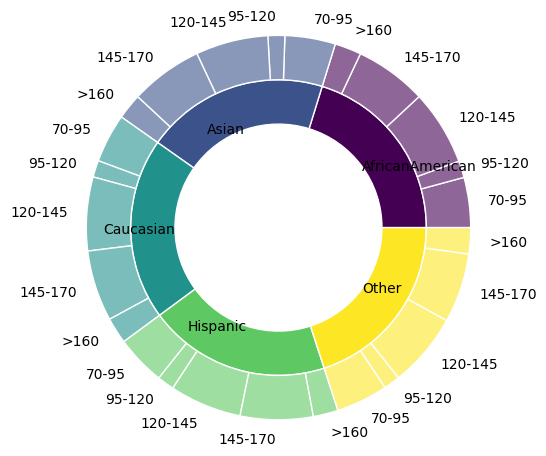

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузим датасет
df = pd.read_csv("diabetes_dataset.csv")

# Параметры для диапазонов
lower_limit = 70  # Нижний предел
upper_limit = 160  # Верхний предел
glucose_step = 25  # Шаг для интервалов

# Создаем интервалы для уровня глюкозы
glucose_bins = list(range(lower_limit, upper_limit + glucose_step, glucose_step))
glucose_bins.append(float('inf'))  # Добавляем интервал для значений больше верхней границы

# Внутренний круг - распределение по расам
race_columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]
race_counts = df[race_columns].sum()
inner_values = race_counts.values
inner_labels = race_counts.index.str.replace("race:", "")

# Внешний круг - распределение по уровням глюкозы в зависимости от расы
outer_values = []
outer_labels = []

for race in race_columns:
    race_df = df[df[race] == 1]
    glucose_distribution = pd.cut(race_df['blood_glucose_level'], bins=glucose_bins).value_counts().sort_index()
    outer_values.extend(glucose_distribution.values)

    # Формируем метки с учетом диапазонов, включая "<Нижний" и ">Верхний"
    outer_labels.extend(
        [f"<{lower_limit}" if interval.left == float('-inf') else
         (f"{int(interval.left)}-{int(interval.right)}" if interval.right != float('inf') else f">{upper_limit}")
         for interval in glucose_distribution.index]
    )

# Настройка цветов
inner_colors = plt.cm.viridis(np.linspace(0, 1, len(inner_values)))
outer_colors = [(color[0], color[1], color[2], 0.6) for color in inner_colors for _ in range(len(glucose_bins) - 1)]

# Построение диаграммы
fig, ax = plt.subplots()
ax.axis('equal')
size = 1.3  # Размер внешнего круга

# Внутренняя круговая диаграмма (раса)
inner_pie, _ = ax.pie(
    inner_values,
    radius=size - 0.3,
    labels=inner_labels,
    colors=inner_colors,
    labeldistance=0.7,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Внешняя круговая диаграмма (уровень глюкозы)
outer_pie, _ = ax.pie(
    outer_values,
    radius=size,
    labels=outer_labels,
    colors=outer_colors,
    labeldistance=1.1,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Установка отступов
plt.margins(0, 0)
plt.show()


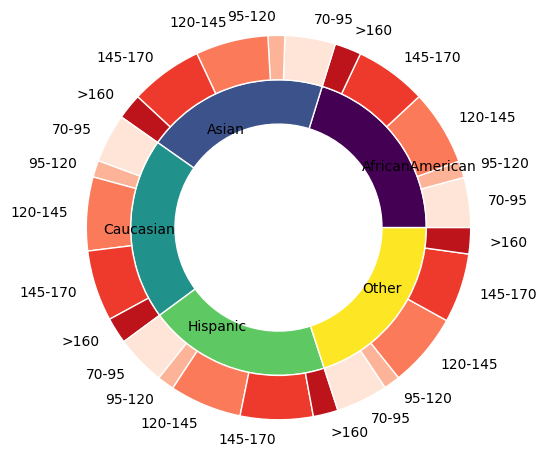

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузим датасет
df = pd.read_csv("diabetes_dataset.csv")

# Параметры для диапазонов
lower_limit = 70  # Нижний предел
upper_limit = 160  # Верхний предел
glucose_step = 25  # Шаг для интервалов

# Создаем интервалы для уровня глюкозы
glucose_bins = list(range(lower_limit, upper_limit + glucose_step, glucose_step))
glucose_bins.append(float('inf'))  # Добавляем интервал для значений больше верхней границы

# Создаем фиксированные цвета для каждого диапазона
glucose_colors = plt.cm.Reds(np.linspace(0.1, 0.8, len(glucose_bins) - 1))

# Внутренний круг - распределение по расам
race_columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]
race_counts = df[race_columns].sum()
inner_values = race_counts.values
inner_labels = race_counts.index.str.replace("race:", "")

# Внешний круг - распределение по уровням глюкозы в зависимости от расы
outer_values = []
outer_labels = []
outer_colors = []

for race in race_columns:
    race_df = df[df[race] == 1]
    glucose_distribution = pd.cut(race_df['blood_glucose_level'], bins=glucose_bins).value_counts().sort_index()
    outer_values.extend(glucose_distribution.values)

    # Формируем метки с учетом диапазонов, включая "<Нижний" и ">Верхний"
    outer_labels.extend(
        [f"<{lower_limit}" if interval.left == float('-inf') else
         (f"{int(interval.left)}-{int(interval.right)}" if interval.right != float('inf') else f">{upper_limit}")
         for interval in glucose_distribution.index]
    )

    # Добавляем цвета для каждой группы, используя фиксированные цвета для диапазонов
    outer_colors.extend(glucose_colors)

# Настройка цветов внутреннего круга
inner_colors = plt.cm.viridis(np.linspace(0, 1, len(inner_values)))

# Построение диаграммы
fig, ax = plt.subplots()
ax.axis('equal')
size = 1.3  # Размер внешнего круга

# Внутренняя круговая диаграмма (раса)
inner_pie, _ = ax.pie(
    inner_values,
    radius=size - 0.3,
    labels=inner_labels,
    colors=inner_colors,
    labeldistance=0.7,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Внешняя круговая диаграмма (уровень глюкозы)
outer_pie, _ = ax.pie(
    outer_values,
    radius=size,
    labels=outer_labels,
    colors=outer_colors,
    labeldistance=1.1,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Установка отступов
plt.margins(0, 0)
plt.show()


7 ЗАДАНИЕ: Покажите зависимость между ростом, весом и возрастом
ваших однокурсников с помощью Bubble plot и Box plot.

7 ЗАДАНИЕ: Покажите зависимость между уровнем hbA1c, уровнем глюкозы, возрастом и наличием диабета
больных диабетом с помощью Bubble plot и Box plot.

 blood_glucose_level, hbA1c_level и диабетиками


<ipython-input-1-614fa81039d3>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averaged = grouped.groupby(['blood_glucose_bin', 'hbA1c_bin']).agg(


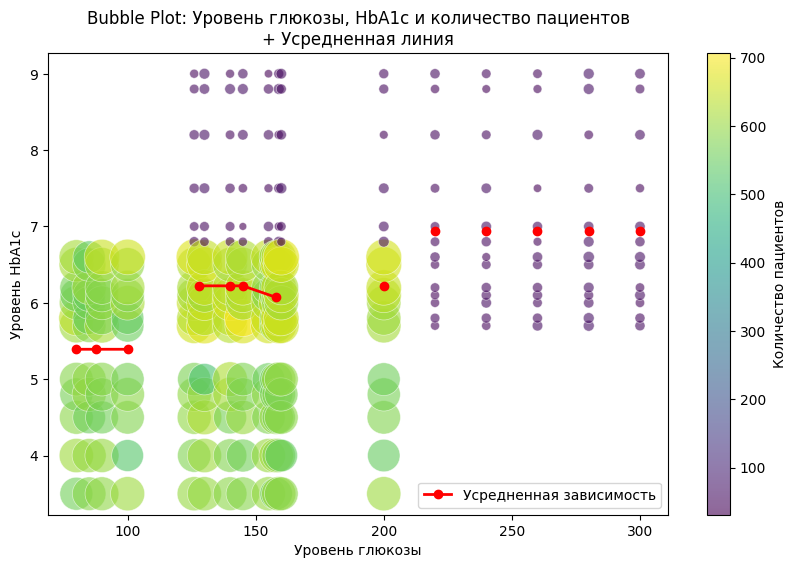

<ipython-input-1-614fa81039d3>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


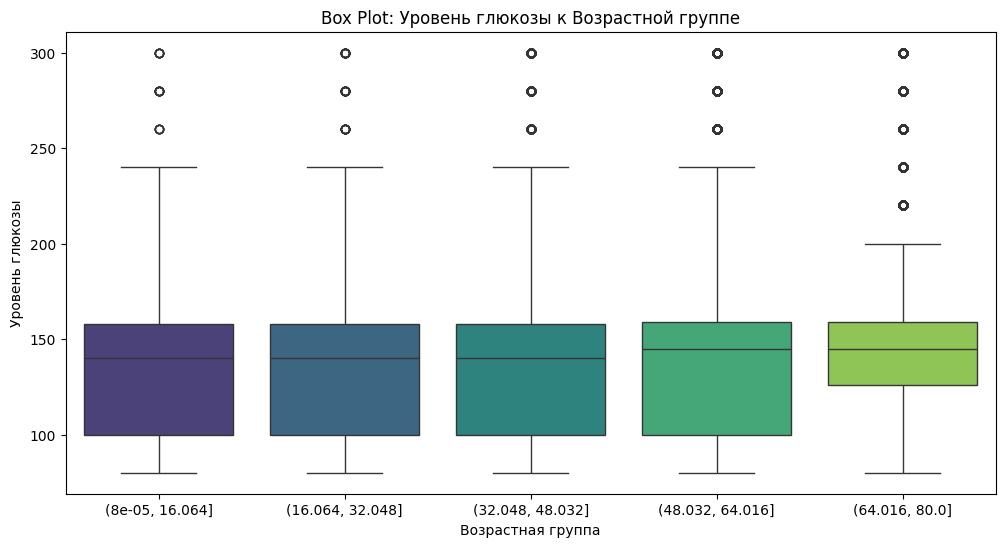

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv("diabetes_dataset.csv")

# Группировка данных и подсчет количества пациентов в каждой группе
grouped = df.groupby(['blood_glucose_level', 'hbA1c_level']).size().reset_index(name='patient_count')

# Добавление бинов для усреднения
bin_size = 10  # Размер интервала для группировки
grouped['blood_glucose_bin'] = pd.cut(grouped['blood_glucose_level'], bins=np.arange(0, grouped['blood_glucose_level'].max() + bin_size, bin_size))
grouped['hbA1c_bin'] = pd.cut(grouped['hbA1c_level'], bins=np.arange(0, grouped['hbA1c_level'].max() + bin_size, bin_size))

# Учитываем средние значения по бинам
averaged = grouped.groupby(['blood_glucose_bin', 'hbA1c_bin']).agg(
    avg_blood_glucose=('blood_glucose_level', 'mean'),
    avg_hbA1c=('hbA1c_level', 'mean'),
    total_patients=('patient_count', 'sum')
).reset_index()

# Bubble Plot
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    grouped['blood_glucose_level'],
    grouped['hbA1c_level'],
    s=grouped['patient_count'],  # Размер пузырьков для визуализации
    c=grouped['patient_count'],  # Цвет зависит от количества пациентов
    cmap="viridis",  # Цветовая карта для количества пациентов
    alpha=0.6,
    edgecolors="w",
    linewidth=0.5
)

# Добавляем усредненную линию
plt.plot(
    averaged['avg_blood_glucose'],
    averaged['avg_hbA1c'],
    color='red',
    linewidth=2,
    marker='o',
    label='Усредненная зависимость'
)

plt.colorbar(scatter, label="Количество пациентов")  # Легенда для количества пациентов
plt.xlabel("Уровень глюкозы")
plt.ylabel("Уровень HbA1c")
plt.title("Bubble Plot: Уровень глюкозы, HbA1c и количество пациентов\n+ Усредненная линия")
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))

# Используем Seaborn для более простого построения Box Plot
sns.boxplot(
    x=pd.cut(df['age'], bins=5),  # Разделяем возраст на категории для лучшей визуализации
    y="blood_glucose_level",
    data=df,
    palette="viridis"
)

plt.xlabel("Возрастная группа")
plt.ylabel("Уровень глюкозы")
plt.title("Box Plot: Уровень глюкозы к Возрастной группе")
plt.show()
